In [1]:
# Importing the necessary libraries.

import numpy as np # Importing numpy for numerical computation
import pandas as pd # Importing pandas for working with pre-processing and manipulation of dataframes
import matplotlib.pyplot as plt # Plotting library matplotlib
import seaborn as sns # Plotting library seaborn
from sklearn.linear_model import LogisticRegression # Importing logistic regression model
from sklearn.model_selection import train_test_split # Splitling in train and test set
from sklearn.linear_model import LogisticRegression # Importing logistic regression model
from sklearn.metrics import accuracy_score # Evaualating accuracy of logistic regression model

In [2]:
# Reading the comma seperated (csv) file using pandas library to dataframe using read_csv() function
df = pd.read_csv(r"C:\Birla\Sem_2\TCS\ML\IA-1\ML Project 1 Dataset.csv") 
df

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,38933,0,YES,1,0,36,M,3,1,0,0,1,0,24,0,0.840564,24,1
13295,38935,2,NO,1,1,29,F,1,0,1,0,4,1,25,2,0.450000,12,1
13296,38937,0,YES,1,1,28,F,0,0,1,0,2,1,13,2,0.593333,36,1
13297,38939,0,YES,1,1,28,F,0,0,1,1,3,1,13,2,0.106667,36,0


In [129]:
df.isna().sum() # Checking if there is a any null or missing columns in the dataset.

APP_ID                 0
 CIBIL_SCORE_VALUE     0
NEW_CUST               0
CUS_CATGCODE           0
 EMPLOYMENT_TYPE       0
AGE                    0
 SEX                   0
 NO_OF_DEPENDENTS      0
 MARITAL               0
 EDU_QUA               0
  P_RESTYPE            0
 P_CATEGORY            0
 EMPLOYEE_TYPE         0
  MON_IN_OCC           0
 INCOM_EXP_GMI         0
LTV                    0
 TENURE                0
STATUS                 0
dtype: int64

In [130]:
# Removing all the unwanted white space from left and right of the columns.

df.rename(columns=lambda x: x.strip(), inplace=True)
df

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.77,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.62,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.85,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.52,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.61,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,38933,0,YES,1,0,36,M,3,1,0,0,1,0,24,0,0.84,24,1
13295,38935,2,NO,1,1,29,F,1,0,1,0,4,1,25,2,0.45,12,1
13296,38937,0,YES,1,1,28,F,0,0,1,0,2,1,13,2,0.59,36,1
13297,38939,0,YES,1,1,28,F,0,0,1,1,3,1,13,2,0.11,36,0


In [131]:
df.dtypes

APP_ID                 int64
CIBIL_SCORE_VALUE      int64
NEW_CUST              object
CUS_CATGCODE           int64
EMPLOYMENT_TYPE        int64
AGE                    int64
SEX                   object
NO_OF_DEPENDENTS       int64
MARITAL                int64
EDU_QUA                int64
P_RESTYPE              int64
P_CATEGORY             int64
EMPLOYEE_TYPE          int64
MON_IN_OCC             int64
INCOM_EXP_GMI          int64
LTV                  float64
TENURE                 int64
STATUS                 int64
dtype: object

In [132]:
print("Unique values for 'New_CUST': ", set(df["NEW_CUST"]))
print("Unique values for 'SEX': ",set(df["SEX"]))

Unique values for 'New_CUST':  {'YES', 'NO'}
Unique values for 'SEX':  {'F', 'M'}


In [133]:
df["NEW_CUST"] = df["NEW_CUST"].apply(lambda x : 1 if x == "YES" else 0)
df["SEX"] = df["SEX"].apply(lambda x : 1 if x == "F" else 0)

In [134]:
df.dtypes

APP_ID                 int64
CIBIL_SCORE_VALUE      int64
NEW_CUST               int64
CUS_CATGCODE           int64
EMPLOYMENT_TYPE        int64
AGE                    int64
SEX                    int64
NO_OF_DEPENDENTS       int64
MARITAL                int64
EDU_QUA                int64
P_RESTYPE              int64
P_CATEGORY             int64
EMPLOYEE_TYPE          int64
MON_IN_OCC             int64
INCOM_EXP_GMI          int64
LTV                  float64
TENURE                 int64
STATUS                 int64
dtype: object

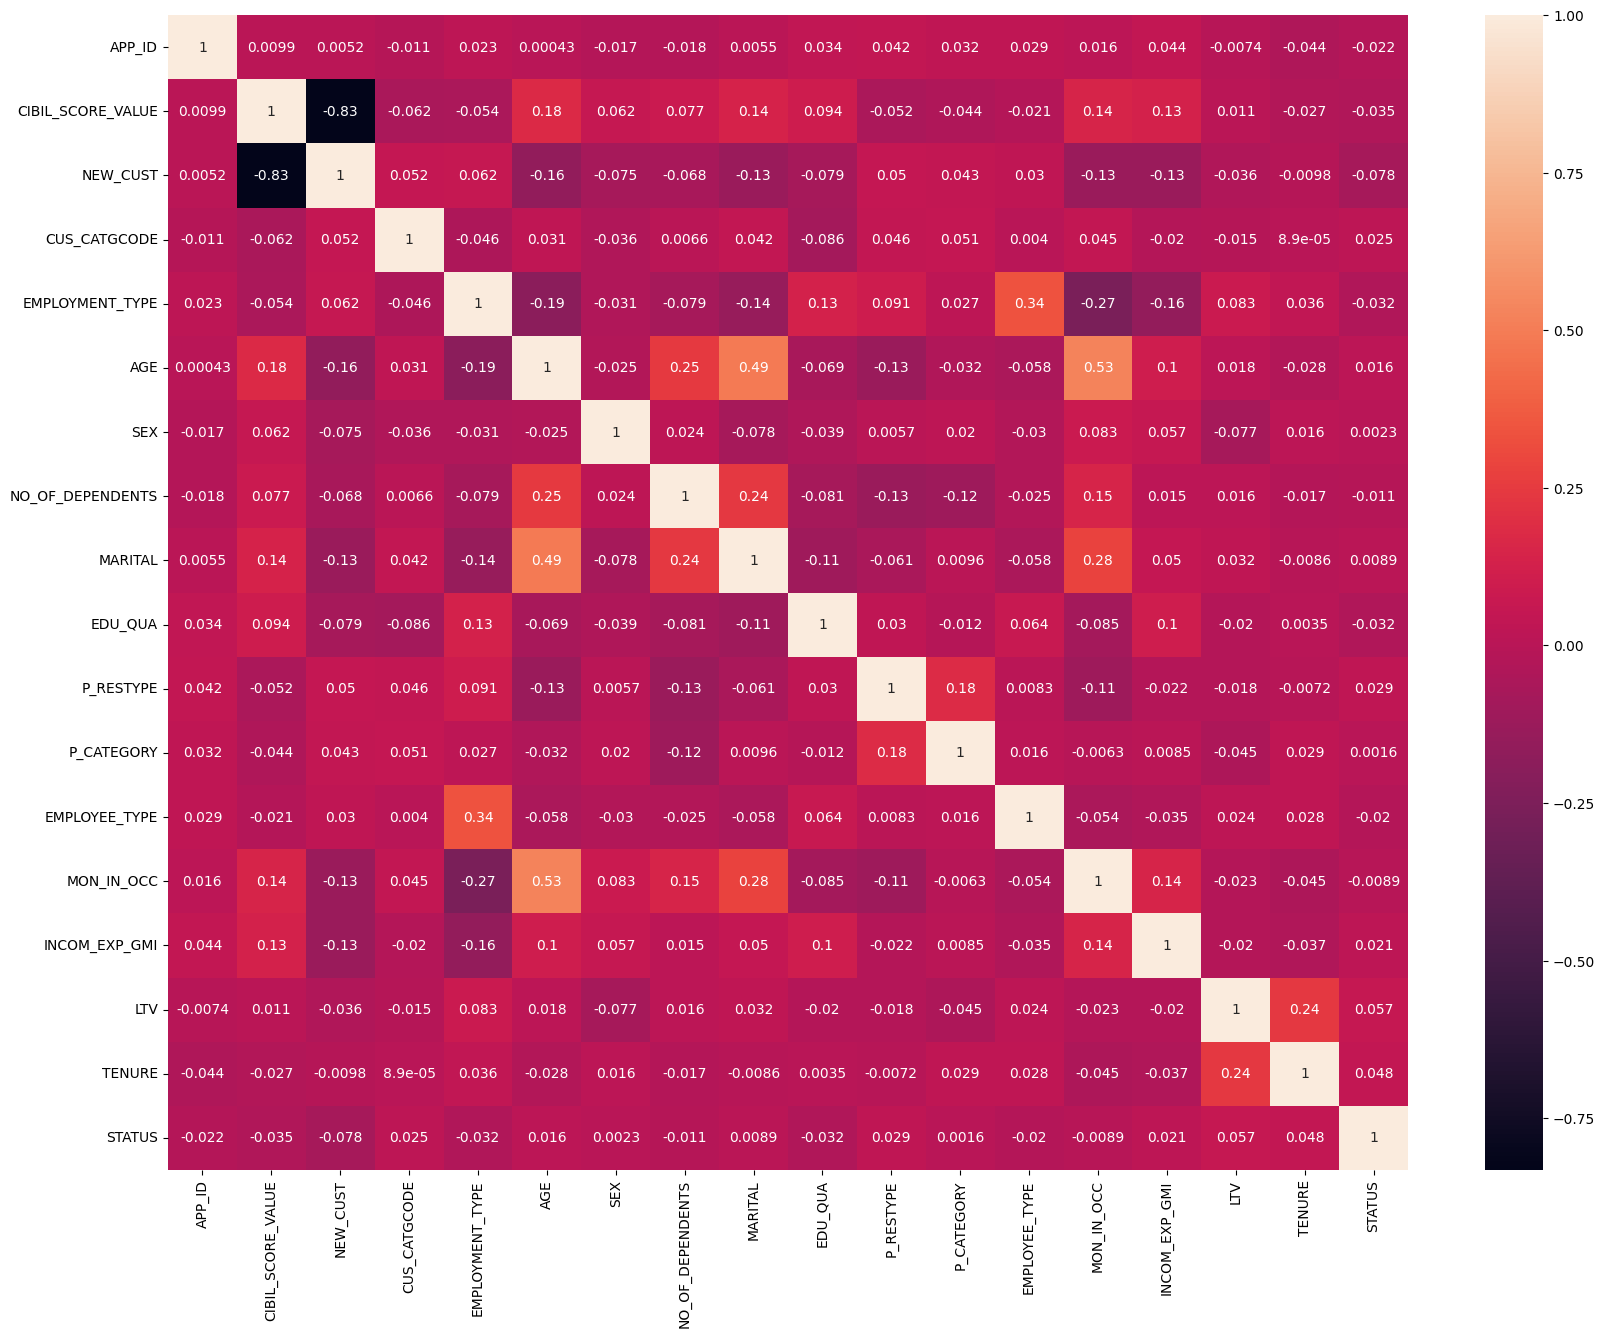

In [135]:
# Co-relation plot of all the feature vectors that are highly co-related with the target variable.

plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(),annot=True)
plt.show()

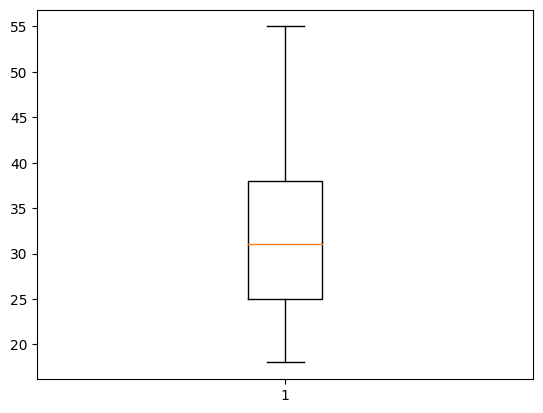

In [136]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["AGE"], flierprops=red_circle)
plt.show()

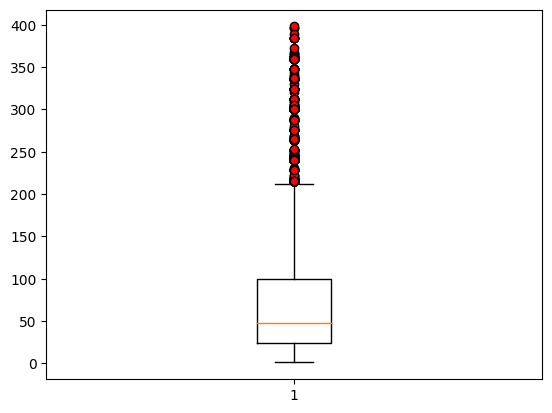

In [137]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["MON_IN_OCC"], flierprops=red_circle)
plt.show()

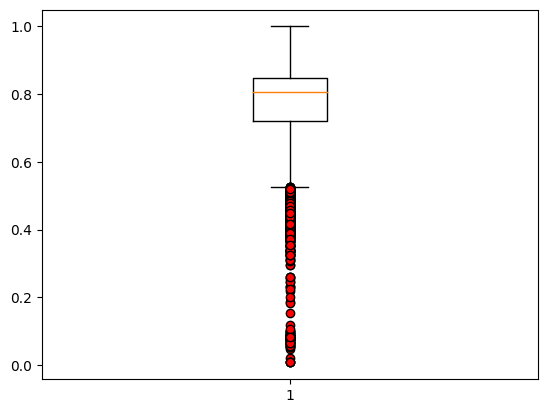

In [138]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["LTV"], flierprops=red_circle)
plt.show()

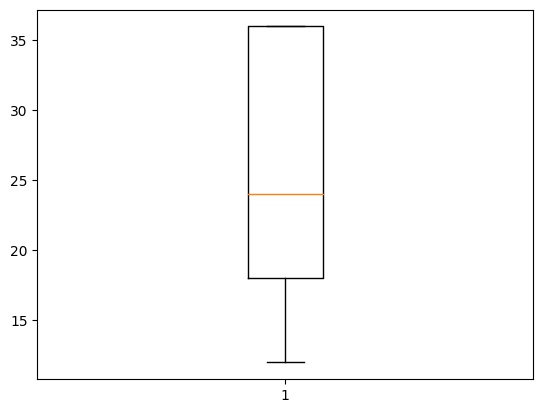

In [139]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["TENURE"], flierprops=red_circle)
plt.show()

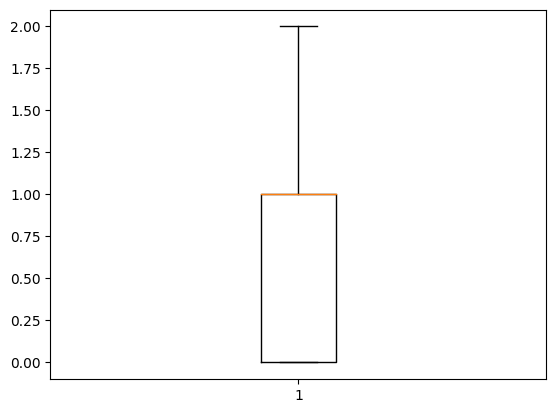

In [140]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["EMPLOYEE_TYPE"], flierprops=red_circle)
plt.show()

In [141]:
# # Dealing with outliers using the capping method. Rather than deleting the outliers capping the outlieres are better choice.
# # Capping method is a method where I have added the outliers that was present to the left and right tail of the normal distrubution.

for i in df.columns:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[i] = np.where(df[i] > upper_limit, upper_limit, 
    np.where(
        df[i] < lower_limit, lower_limit, df[i]
    ))

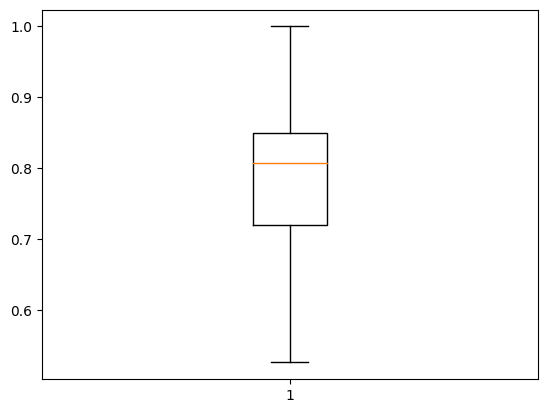

In [142]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["LTV"], flierprops=red_circle)
plt.show()

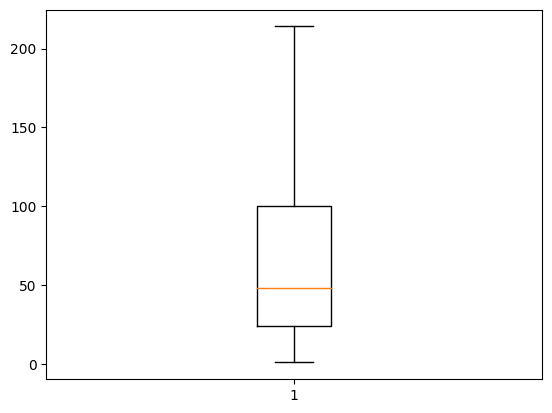

In [143]:
# Plotting Box plot or 5 number summary to see the distribution and outliers.

red_circle = dict(markerfacecolor = 'red', marker='o')
plt.boxplot(df["MON_IN_OCC"], flierprops=red_circle)
plt.show()

In [144]:
X = df.drop(columns= "STATUS")
X

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE
0,12345.00,0.00,1.00,1.00,0.00,31.00,1.00,3.00,0.00,0.00,1.00,4.00,2.00,36.00,0.00,0.77,12.00
1,12347.00,0.00,0.00,1.00,1.00,40.00,1.00,2.00,1.00,1.00,0.00,1.00,1.00,12.00,2.00,0.62,24.00
2,12349.00,0.00,1.00,1.00,0.00,27.00,1.00,3.00,0.00,0.00,1.00,2.00,2.00,72.00,0.00,0.85,36.00
3,12351.00,2.00,0.00,1.00,1.00,33.00,1.00,2.00,0.00,1.00,0.00,2.00,1.00,120.00,1.00,0.53,12.00
4,12353.00,2.00,0.00,1.00,1.00,29.00,1.00,1.00,0.00,1.00,1.00,2.00,1.00,24.00,2.00,0.61,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13294,38933.00,0.00,1.00,1.00,0.00,36.00,1.00,3.00,1.00,0.00,0.00,1.00,0.00,24.00,0.00,0.84,24.00
13295,38935.00,2.00,0.00,1.00,1.00,29.00,1.00,1.00,0.00,1.00,0.00,4.00,1.00,25.00,2.00,0.53,12.00
13296,38937.00,0.00,1.00,1.00,1.00,28.00,1.00,0.00,0.00,1.00,0.00,2.00,1.00,13.00,2.00,0.59,36.00
13297,38939.00,0.00,1.00,1.00,1.00,28.00,1.00,0.00,0.00,1.00,1.00,3.00,1.00,13.00,2.00,0.53,36.00


In [145]:
y = df[["STATUS"]]
y

,STATUS
0,0.00
1,0.00
2,0.00
3,0.00
4,1.00
...,...
13294,1.00
13295,1.00
13296,1.00
13297,0.00


In [146]:
# Splitting the train and test data in X_train, X_test, y_train and y_test
# Where, 
# X_train and y_train will be for training.
# X_test and y_test will be for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)
print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

X train: (9974, 17)
X test: (3325, 17)
y train: (9974, 1)
y test: (3325, 1)


In [147]:
# Using sklearn's LogisticRegression model and training it with train datasets.

log_model = LogisticRegression() 
log_model.fit(X_train, y_train)

LogisticRegression()

In [148]:
# log_model = LogisticRegression(penalty = 'l2', C=10, fit_intercept = True, intercept_scaling = 1, class_weight='balanced', random_state = 42, solver='saga') 
# log_model.fit(X_train, y_train)

In [149]:
y_pred = log_model.predict(X_test) # Predicting on test dataset
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [150]:
# Evaluating the model accuracy of Logistic Regression model

# Accuracy = r2_score(y_test['No'], y_pred) * 100
Accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Accuracy is: {Accuracy}")

Accuracy is: 63.21804511278195


In [158]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [160]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth= 30, min_samples_split= 20, min_samples_leaf=20)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=20, min_samples_split=20)

In [161]:
y_pred = clf.predict(X_test) # Predicting on test dataset
Accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Accuracy is: {Accuracy}")

Accuracy is: 67.09774436090225


In [154]:
# from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:52<00:00,  1.82s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.67               0.60     0.60      0.64   
AdaBoostClassifier                 0.66               0.60     0.60      0.64   
RandomForestClassifier             0.66               0.60     0.60      0.64   
SVC                                0.66               0.60     0.60      0.64   
XGBClassifier                      0.65               0.59     0.59      0.63   
ExtraTreesClassifier               0.65               0.59     0.59      0.63   
SGDClassifier                      0.64               0.58     0.58      0.62   
NuSVC                              0.61               0.57     0.57      0.61   
LinearDiscriminantAnalysis         0.65               0.57     0.57      0.61   
BaggingClassifier                  0.63               0.57     0.57      0.61   
LinearSVC                   

In [155]:
print(predictions)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.67               0.60     0.60      0.64   
AdaBoostClassifier                 0.66               0.60     0.60      0.64   
RandomForestClassifier             0.66               0.60     0.60      0.64   
SVC                                0.66               0.60     0.60      0.64   
XGBClassifier                      0.65               0.59     0.59      0.63   
ExtraTreesClassifier               0.65               0.59     0.59      0.63   
SGDClassifier                      0.64               0.58     0.58      0.62   
NuSVC                              0.61               0.57     0.57      0.61   
LinearDiscriminantAnalysis         0.65               0.57     0.57      0.61   
BaggingClassifier                  0.63               0.57     0.57      0.61   
LinearSVC                   